In [2]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
%matplotlib inline

data = original_data = pd.read_csv('adult.data.txt', header=None, names=['age', 'workclass', 'fnlwg', 'education', 'education.num', 'marital.status', 
                         'occupation','relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 
                         'hours.per.week', 'native.country', 'income'], na_values=' ?')

c:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
print(data.isnull().sum() / data.count() * 100)

age               0.000000
workclass         5.975590
fnlwg             0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.999740
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.823128
income            0.000000
dtype: float64


In [4]:
data['native.country'].fillna(' United-States', inplace=True)
data['workclass'].fillna(' Private', inplace=True)
data = data.dropna()
data = data.drop_duplicates(keep='first')

In [5]:
print(set(data['income']))
data['income'] = data['income'].map({' <=50K': 0, ' >50K': 1}).astype(int)

data.describe()

{' >50K', ' <=50K'}


,age,fnlwg,education.num,capital.gain,capital.loss,hours.per.week,income
count,30694.000000,3.069400e+04,30694.000000,30694.000000,30694.000000,30694.000000,30694.000000
mean,38.447612,1.898482e+05,10.131557,1106.901903,88.979735,40.952759,0.249169
std,13.115154,1.054651e+05,2.561280,7500.730406,405.808149,11.984367,0.432539
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.785135e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.372938e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [6]:
val = len(data)
print(len(data[data['income'] == 1])/val)
print(len(data[data['income'] == 0])/val)

0.24916921873981887
0.7508307812601811


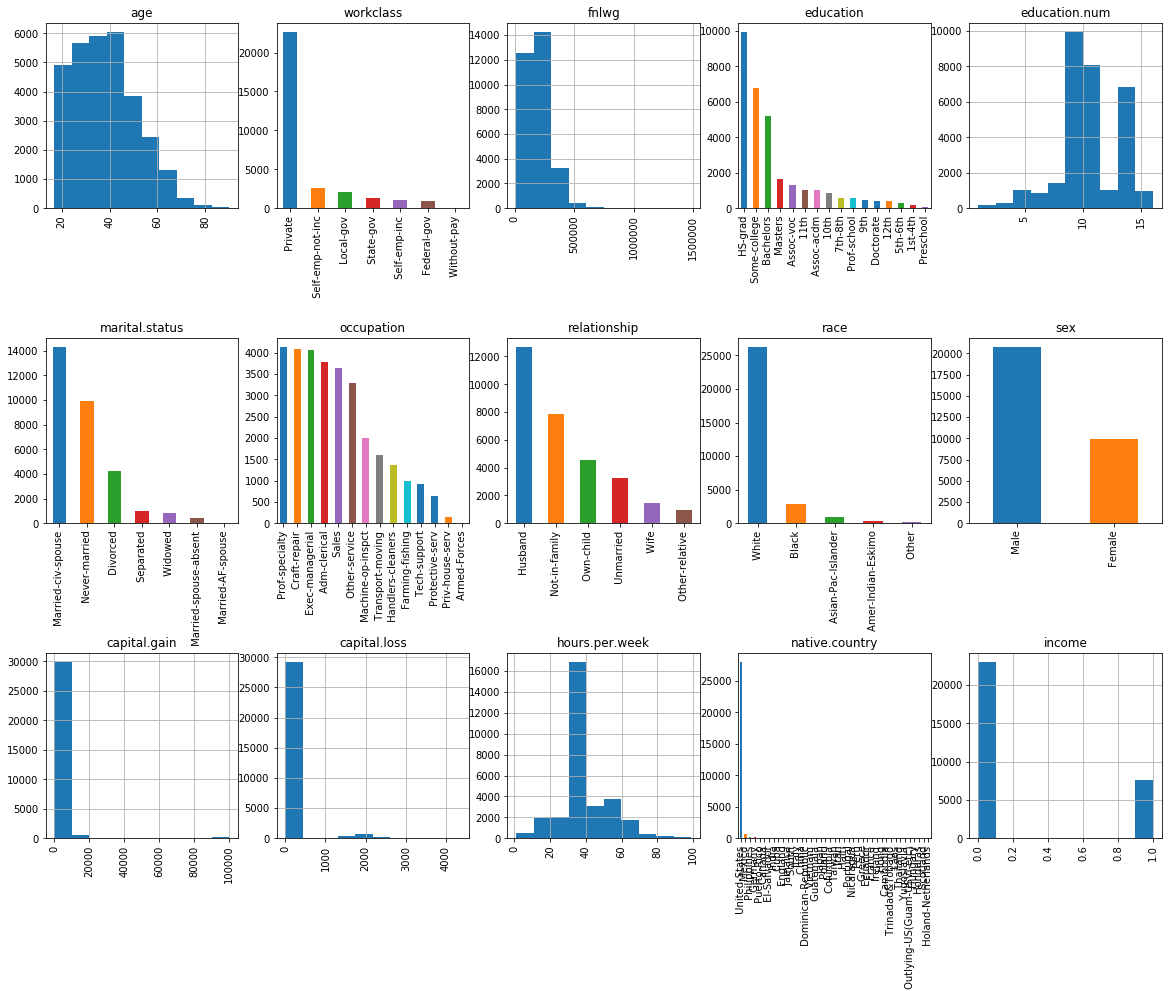

In [7]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = 3
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

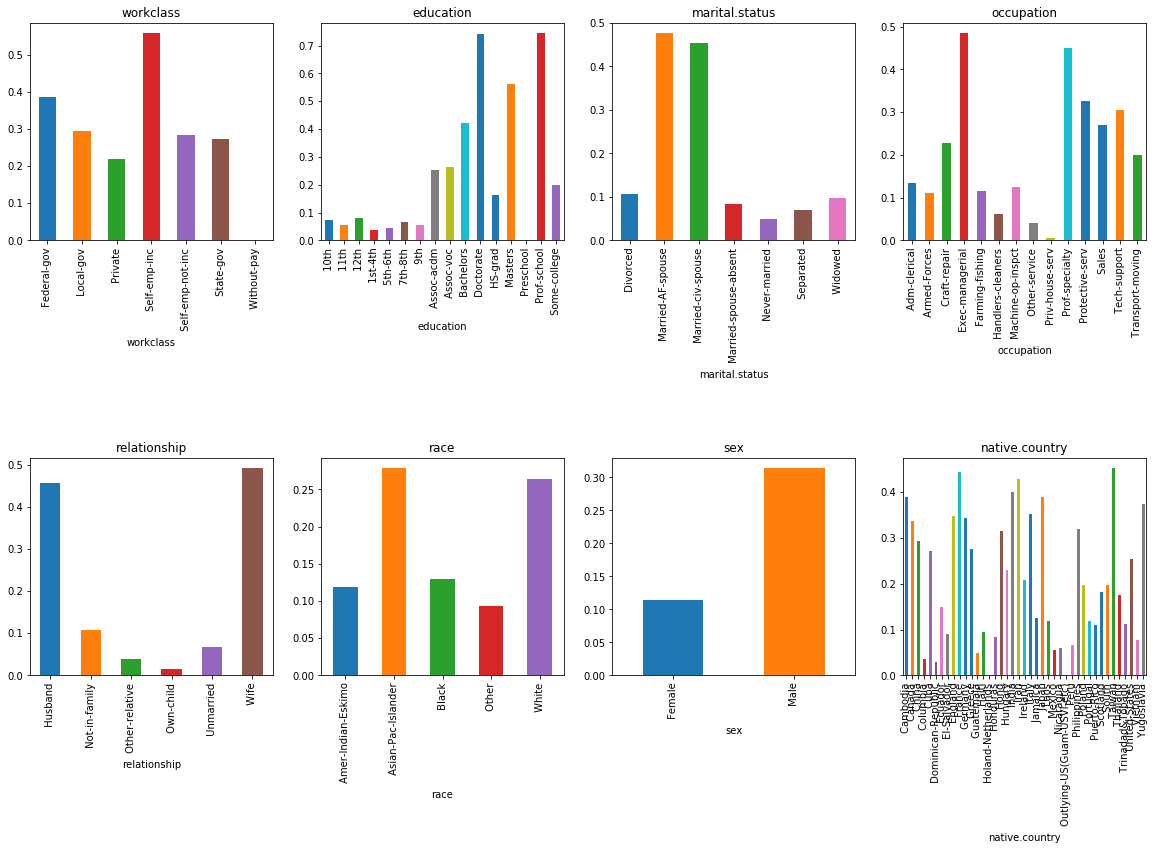

In [8]:
fig = plt.figure(figsize=(20,20))

cols = 4
rows = 3

num = 0
for i, column in enumerate(data.columns):
    if column == 'age' or column == 'hours.per.week' or column == 'fnlwg' or column == 'capital.gain' or column == 'capital.loss' or column == 'income' or column == 'education.num':
        continue
    
    num += 1
    ax = fig.add_subplot(rows, cols, num)
    ax.set_title(column)
    
    if data.dtypes[column] == np.object:
        data.groupby(str(column)).income.mean().plot(title='', kind="bar", axes=ax)
    else:
        data.groupby(str(column)).income.mean().plot(title='', kind="bar", axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=1, wspace=0.2)

In [9]:
data['sex'] = data['sex'].map({' Female': 0, ' Male': 1}).astype(int)

In [10]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    
    for column in result.columns:
        if result.dtypes[column] == np.object:
            ar = list(result.groupby(str(column)).income.mean().sort_values().index)

            encoders[column] = preprocessing.LabelEncoder()
            encoders[column] = encoders[column].fit(ar)
            
            result[column] = encoders[column].transform(result[column])
            
    return result, encoders

def plot_cor():
    # Calculate the correlation and plot it
    encoded_data, _ = number_encode_features(data)
    corr = encoded_data.corr()

    plt.subplots(figsize=(12, 9))

    k = 15 #number of variables for heatmap
    cols = corr.nlargest(k, 'income')['income'].index

    hm = sns.heatmap(np.corrcoef(encoded_data[cols].values.T), annot=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')
    plt.show()

In [11]:
data[['education', 'education.num']].head(15)

,education,education.num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [12]:
del data['education']

In [13]:
original_data[['sex', 'relationship']].head(15)

,sex,relationship
0,Male,Not-in-family
1,Male,Husband
2,Male,Not-in-family
3,Male,Husband
4,Female,Wife
5,Female,Wife
6,Female,Not-in-family
7,Male,Husband
8,Female,Not-in-family
9,Male,Husband


In [14]:
data['relationship'] = data['relationship'].replace([' Husband', ' Wife'], [' Married', ' Married'])

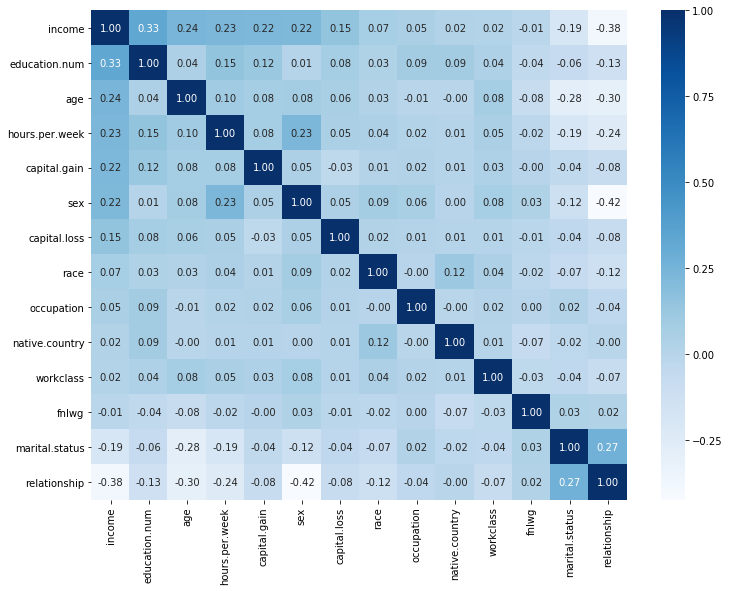

In [15]:
plot_cor()

In [16]:
print(pd.crosstab(data['relationship'], data['marital.status']))

marital.status    Divorced   Married-AF-spouse   Married-civ-spouse  \
relationship                                                          
 Married                 0                  19                14114   
 Not-in-family        2289                   0                   14   
 Other-relative        105                   1                  119   
 Own-child             309                   1                   86   
 Unmarried            1553                   0                    0   

marital.status    Married-spouse-absent   Never-married   Separated   Widowed  
relationship                                                                   
 Married                              0               0           0         0  
 Not-in-family                      194            4525         394       436  
 Other-relative                      30             569          53        41  
 Own-child                           44            3979          90        12  
 Unmarried            

In [17]:
data['marital.status'] = data['marital.status'].replace([' Married-AF-spouse', ' Married-civ-spouse'], ' Married')

In [18]:
encoded_data, encoders = number_encode_features(data)
del encoded_data['income']

In [19]:
target = data['income']
del data['income']

In [20]:
X = encoded_data.copy()
del X['fnlwg']
# del X['race']
# del X['native.country']
# del X['marital.status']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, target, train_size=0.7)

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

ar = [LogisticRegression, GaussianNB, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier]
b = [1, 1, 1, 3, 3, 1, 8]

res, tres, mod, TP, FP, TN, FN = [], [], [], [], [], [], []
for i, x in enumerate(ar):
    mod.append(x.__name__)
    score, tscore = 0, 0
    tmp = np.array((2, 2))
    
    for j in range(b[i]):
    
        model = x()
        if(mod[-1] == 'KNeighborsClassifier'):
            model = x(23)

        model.fit(X_train, y_train)

        _score = model.score(X_test, y_test)
        _tscore = model.score(X_train, y_train)
        
        y = model.predict(X_test)
        _tmp = confusion_matrix(y_test, y)
        
        if(_score > score):
            score = _score
            tscore = _tscore
            tmp = _tmp
            
    TN.append(tmp[0][0])
    FP.append(tmp[0][1])
    FN.append(tmp[1][0])
    TP.append(tmp[1][1])
    res.append(score)
    tres.append(tscore)
    
df = pd.DataFrame({'Model' : mod, 'Accuracy on Training Set' : tres, 'Accuracy on Test Set' : res, 'TP' : TP, 'FP' : FP, 'TN':TN, 'FN':FN})
print(df)

                        Model  Accuracy on Training Set  Accuracy on Test Set  \
0          LogisticRegression                  0.835467              0.834075   
1                  GaussianNB                  0.802234              0.800087   
2        KNeighborsClassifier                  0.857622              0.836682   
3      DecisionTreeClassifier                  0.978450              0.813443   
4      RandomForestClassifier                  0.967698              0.840265   
5          AdaBoostClassifier                  0.857761              0.856771   
6  GradientBoostingClassifier                  0.866884              0.861006   

     TP   FP    TN    FN  
0  1211  450  6470  1078  
1   848  400  6520  1441  
2  1356  571  6349   933  
3  1428  857  6063   861  
4  1398  580  6340   891  
5  1465  495  6425   824  
6  1412  403  6517   877  


In [ ]:
model = GradientBoostingClassifier()
model.fit(X, target)

X = X.rename(index=str, columns={"education.num": "education", "marital.status": "m.status", "hours.per.week" : "hours"})

LABELS = list(X.columns)
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

X = range(len(model.feature_importances_))
y = model.feature_importances_
plt.bar(X, y);
plt.xticks(X, LABELS);